In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os
import PIL.Image as Image
import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from sklearn.model_selection import train_test_split

print("All Set")

All Set


In [41]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(
    "flower_photos", origin=dataset_url, untar=True
)
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('C:/Users/himek/.keras/datasets/flower_photos')

In [42]:
path = r"C:/Users/himek/.keras/datasets/flower_photos"
path

'C:/Users/himek/.keras/datasets/flower_photos'

In [43]:
data_dir = pathlib.Path(path)
data_dir

WindowsPath('C:/Users/himek/.keras/datasets/flower_photos')

In [44]:
for i in data_dir.iterdir():
    print(i)

C:\Users\himek\.keras\datasets\flower_photos\daisy
C:\Users\himek\.keras\datasets\flower_photos\dandelion
C:\Users\himek\.keras\datasets\flower_photos\flower_photos
C:\Users\himek\.keras\datasets\flower_photos\LICENSE.txt
C:\Users\himek\.keras\datasets\flower_photos\roses
C:\Users\himek\.keras\datasets\flower_photos\sunflowers
C:\Users\himek\.keras\datasets\flower_photos\tulips


Preparing DataSet

In [45]:
flower_dict = {
    "roses": list(data_dir.glob("roses/*")),
    "daisy": list(data_dir.glob("daisy/*")),
    "sunflowers": list(data_dir.glob("sunflowers/*")),
    "dandelion": list(data_dir.glob("dandelion/*")),
    "tulips": list(data_dir.glob("tulips/*")),
}

Label Encoding


In [46]:
flowers ={
    "roses": 0,
    "daisy": 1,
    "sunflowers": 2,
    "dandelion": 3,
    "tulips": 4,
}

In [47]:
flower_dict["sunflowers"][0]

WindowsPath('C:/Users/himek/.keras/datasets/flower_photos/sunflowers/1008566138_6927679c8a.jpg')

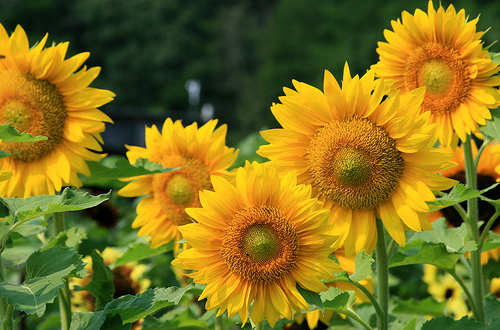

In [48]:
Image.open(flower_dict["sunflowers"][0])

In [49]:
no_of_classes = len(flower_dict.items())
no_of_classes

5

In [50]:

x ,y  = [],[]

for key,value in flower_dict.items():
    for item in value:
        img = cv2.imread(str(item))
        re_img = cv2.resize(img, (240, 240))
        x.append(re_img)
        y.append(flowers[key])

In [51]:
x = np.array(x)
y = np.array(y)

In [52]:
x.shape, y.shape

((3670, 240, 240, 3), (3670,))

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y,  random_state=0)

In [54]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

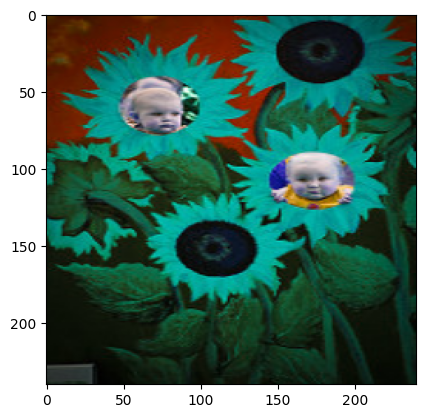

In [55]:
plt.imshow(x_train_scaled[52])
plt.show()

CNN model

In [56]:
model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(240, 240, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),

    layers.Dense(64, activation='relu'),
    
    layers.Dense(no_of_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

c:\Users\himek\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 238, 238, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 119, 119, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 117, 117, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 58, 58, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    12,845,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,901,765 (49.22 MB)

 Trainable params: 12,901,765 (49.22 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
history = model.fit(x_train_scaled,
                     y_train,
                     epochs=10,
                     validation_split=0.2)

Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 38s 502ms/step - accuracy: 0.2614 - loss: 2.1108 - val_accuracy: 0.4192 - val_loss: 1.2980
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 36s 519ms/step - accuracy: 0.4686 - loss: 1.2726 - val_accuracy: 0.5735 - val_loss: 1.1126
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 39s 560ms/step - accuracy: 0.5766 - loss: 1.0808 - val_accuracy: 0.6098 - val_loss: 0.9835
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 43s 618ms/step - accuracy: 0.6937 - loss: 0.7762 - val_accuracy: 0.5953 - val_loss: 1.0647
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 38s 544ms/step - accuracy: 0.8060 - loss: 0.5302 - val_accuracy: 0.6044 - val_loss: 1.1554
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 39s 570ms/step - accuracy: 0.9224 - loss: 0.2681 - val_accuracy: 0.5717 - val_loss: 1.5737
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 37s 531ms/step - accuracy: 0.9466 - loss: 0.1695 - val_accuracy: 0.5590 - val_loss: 2.0109
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 36s 515ms/step - accuracy: 0.9784 - loss: 0.0853 - val_accu